### Dataset Overview
This dataset details FBI crime rates in Virginia for 2013. Specifically, the dataset includes variables such as population, violent crime, murder, rape, robbery, aggravated assault, property crime, burglary, larceny-theft, motor vehicle theft, and arson.

A link to the dataset can be found here: https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_virginia_by_city_2013.xls

Dataset contains 149 observations across 12 columns

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

### Read data in, take a look, and clean it

In [331]:
va_crime = pd.read_csv('va_crime_2013.csv', skiprows=4)

In [332]:
va_crime.head(10)

,City,Population,Violent_Crime,Murder,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson,Unnamed: 12
0,Abingdon,"8,186",10,0.0,3.0,1.0,6.0,233,20,198,15.0,4.0,NaN
1,Alexandria,"148,519",258,5.0,21.0,118.0,114.0,"2,967",249,"2,427",291.0,13.0,NaN
2,Altavista,"3,486",8,0.0,0.0,2.0,6.0,56,4,52,0.0,0.0,NaN
3,Amherst,"2,223",2,0.0,2.0,0.0,0.0,27,6,19,2.0,0.0,NaN
4,Appalachia,"1,728",12,0.0,2.0,2.0,8.0,77,25,51,1.0,0.0,NaN
5,Ashland,"7,310",26,0.0,1.0,8.0,17.0,246,14,221,11.0,1.0,NaN
6,Bedford,"5,894",12,0.0,4.0,3.0,5.0,237,26,199,12.0,0.0,NaN
7,Berryville,"4,290",5,0.0,2.0,1.0,2.0,80,7,72,1.0,0.0,NaN
8,Big Stone Gap,"5,568",17,0.0,5.0,0.0,12.0,203,21,176,6.0,2.0,NaN
9,Blacksburg,"42,603",31,0.0,7.0,4.0,20.0,523,91,417,15.0,8.0,NaN


In [333]:
#Drop empty column
va_crime.drop(va_crime.columns[len(va_crime.columns)-1], axis=1, inplace=True)

In [334]:
#Determine missing values across dataframe
missing_values_count = va_crime.isnull().sum()
print(missing_values_count)

City                   0
Population             2
Violent_Crime          2
Murder                 2
Rape                   2
Robbery                2
Aggravated_Assault     2
Property_Crime         2
Burglary               2
Larceny_Theft          2
Motor_Vehicle_Theft    2
Arson                  2
dtype: int64


In [335]:
#Drop missing values
va_crime = va_crime.dropna()

In [336]:
#Describe the data
va_crime.describe()

,Murder,Rape,Robbery,Aggravated_Assault,Motor_Vehicle_Theft,Arson
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,1.295302,6.919463,20.234899,36.194631,32.496644,3.255034
std,4.781020,18.423882,72.760008,111.625561,115.290973,11.478625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000
75%,0.000000,4.000000,6.000000,13.000000,11.000000,1.000000
max,37.000000,140.000000,624.000000,842.000000,938.000000,99.000000


In [337]:
va_crime.dtypes

City                    object
Population              object
Violent_Crime           object
Murder                 float64
Rape                   float64
Robbery                float64
Aggravated_Assault     float64
Property_Crime          object
Burglary                object
Larceny_Theft           object
Motor_Vehicle_Theft    float64
Arson                  float64
dtype: object

In [338]:
#Define function to strip comma when there is one
def remove_comma_convert_int(x):
    str(x)
    if x.find(',') != -1:
        return int(x.replace(',', ''))
    else:
        return int(x)

In [339]:
#Apply remove_comma_convert_int function to all approprirate columns

va_crime['Population'] = va_crime['Population'].apply(remove_comma_convert_int)
va_crime['Violent_Crime'] = va_crime['Violent_Crime'].apply(remove_comma_convert_int)
va_crime['Property_Crime'] = va_crime['Property_Crime'].apply(remove_comma_convert_int)
va_crime['Burglary'] = va_crime['Burglary'].apply(remove_comma_convert_int)
va_crime['Larceny_Theft'] = va_crime['Larceny_Theft'].apply(remove_comma_convert_int)

In [340]:
#Convert float columns to int

va_crime['Murder'] = va_crime['Murder'].astype(int)
va_crime['Rape'] = va_crime['Rape'].astype(int)
va_crime['Robbery'] = va_crime['Robbery'].astype(int)
va_crime['Aggravated_Assault'] = va_crime['Aggravated_Assault'].astype(int)
va_crime['Motor_Vehicle_Theft'] = va_crime['Motor_Vehicle_Theft'].astype(int)
va_crime['Arson'] = va_crime['Arson'].astype(int)

### Explore our Dataset

In [341]:
va_crime.Rape.describe()

count    149.000000
mean       6.919463
std       18.423882
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max      140.000000
Name: Rape, dtype: float64

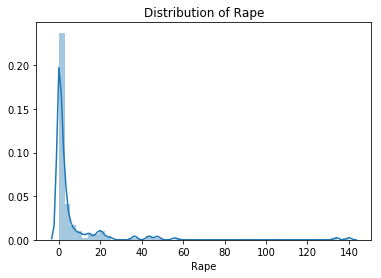

In [342]:
#First, let's look at our outcome variable.
sns.distplot(va_crime.Rape)
plt.title('Distribution of Rape')
plt.show()

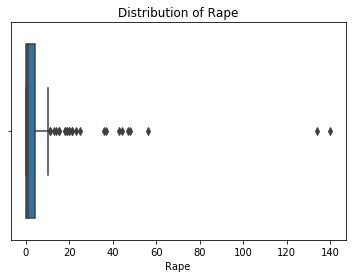

In [343]:
sns.boxplot(x=va_crime["Rape"])
plt.title('Distribution of Rape')
plt.show()

Distribution of Rape is incredibly skewed right, as shown by the histogram and boxplot above. Let's try to remove some of these outliers before we run our models.

In [344]:
va_crime['Rape'].quantile(.95)

36.599999999999994

In [345]:
va_crime = va_crime[va_crime['Rape'] <= 36]

In [348]:
va_crime['Rape'].describe()

count    141.000000
mean       3.418440
std        6.190033
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       36.000000
Name: Rape, dtype: float64

### Engineer additional features

In [311]:
#Popuation_Squared
va_crime['Population_Squared'] = va_crime['Population']**2

In [312]:
#General Theft - Multiply Robbery, Larceny_Theft, Motor_Vehicle_Theft
va_crime['General_Theft'] = va_crime['Robbery'] * va_crime['Larceny_Theft'] * va_crime['Motor_Vehicle_Theft']

In [313]:
#Log of Population
va_crime['Population_Log'] = np.log(va_crime['Population'])

In [349]:
#Establish outcome variable (convert to binary)

va_crime['Rape'] = np.where((va_crime['Rape'] >= 1), 1, 0)

In [351]:
#Let's take a look at our new and improved dataframe

va_crime.head(5)

,City,Population,Violent_Crime,Murder,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
0,Abingdon,8186,10,0,1,1,6,233,20,198,15,4
1,Alexandria,148519,258,5,1,118,114,2967,249,2427,291,13
2,Altavista,3486,8,0,0,2,6,56,4,52,0,0
3,Amherst,2223,2,0,1,0,0,27,6,19,2,0
4,Appalachia,1728,12,0,1,2,8,77,25,51,1,0


In [352]:
rape_total = va_crime['Rape'].sum()
print('Baseline accuracy for Rape is: ' + str(round((rape_total/va_crime.shape[0])*100, 2)) + '%')

Baseline accuracy for Rape is: 56.03%


### Let's start building our models - Goal is to achieve higher accuracy than the baseline of approximately 56%

## Regular Logistic Regression Model
Let's begin by using all features, with the exception of City. 

In [353]:
#Create dataframe slice for features
va_crime_features = va_crime.iloc[:,1:len(va_crime.columns)]

In [354]:
#Drop rape from features dataframe
va_crime_features.drop('Rape', axis=1, inplace=True)

In [355]:
# Declare a logistic regression classifier
lr = LogisticRegression()
Y = va_crime['Rape']
X = va_crime_features

# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(str(lr.score(X, Y)*100) + '%')

Coefficients
[[-2.91093598e-04  2.02726679e+00 -1.19133695e-01 -5.53533983e-01
  -1.73998161e+00  2.29372783e-02  1.58599244e-02 -3.29383195e-02
   4.00156734e-02 -8.99066592e-02]]
[-2.03358964]

 Accuracy
Rape    0   1
row_0        
0      61   6
1       1  73

 Percentage accuracy
95.0354609929078%


In [360]:
#Cross-Validation

display(cross_val_score(lr, va_crime_features, va_crime['Rape'], cv=5))

array([0.93103448, 0.89655172, 0.85714286, 0.89285714, 0.92592593])

For our test data on the other hand, we see a lower success rate, shown through the cross-validation above. We also see overfitting, which may be taken care of by the lasso and ridge regression below.

## Lasso Logistic Regression Model

In [357]:
# Declare a logistic regression classifier, using penalty 'l1' to indicate lasso
lr_lasso = LogisticRegression(penalty='l1')
Y = va_crime['Rape']
X = va_crime_features

# Fit the model.
fit = lr_lasso.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn_lasso = lr_lasso.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn_lasso, Y))

print('\n Percentage accuracy')
print(str(lr_lasso.score(X, Y)*100) + '%')

Coefficients
[[-2.37409541e-04  3.10701832e+00  0.00000000e+00 -2.11366752e+00
  -2.88492287e+00  1.11663418e-04  1.04072678e-02 -3.27233431e-03
   0.00000000e+00  0.00000000e+00]]
[-2.5640129]

 Accuracy
Rape    0   1
row_0        
0      61   2
1       1  77

 Percentage accuracy
97.87234042553192%


In [359]:
#Cross-Validation

display(cross_val_score(lr_lasso, va_crime_features, va_crime['Rape'], cv=5))

array([0.93103448, 0.93103448, 0.92857143, 1.        , 0.92592593])

During cross-validation, we see slight fluctuation for our lasso logistic regression model. However, this is far more consistent than the logistic regression above.

## Ridge Logistic Regression Model

In [361]:
# Declare a logistic regression classifier, using penalty 'l2' to indicate ridge
lr_ridge = LogisticRegression(penalty='l2')
Y = va_crime['Rape']
X = va_crime_features

# Fit the model.
fit = lr_ridge.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn_ridge = lr_ridge.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn_ridge, Y))

print('\n Percentage accuracy')
print(str(lr_ridge.score(X, Y)*100) + '%')

Coefficients
[[-2.91093598e-04  2.02726679e+00 -1.19133695e-01 -5.53533983e-01
  -1.73998161e+00  2.29372783e-02  1.58599244e-02 -3.29383195e-02
   4.00156734e-02 -8.99066592e-02]]
[-2.03358964]

 Accuracy
Rape    0   1
row_0        
0      61   6
1       1  73

 Percentage accuracy
95.0354609929078%


In [363]:
#Cross-Validation

display(cross_val_score(lr_ridge, va_crime_features, va_crime['Rape'], cv=5))

array([0.93103448, 0.89655172, 0.85714286, 0.89285714, 0.92592593])

Similar success rate as our logistic regression model above, but there is indication of overfitting when we test against our folds. 

### Now that we've run several versions of the model, let's try using recursive feature selection on our original logistic regression model and try to improve based off those results

In [364]:
# Pass logistic regression model to the RFE constructor
from sklearn.feature_selection import RFE

selector = RFE(lr)
selector = selector.fit(va_crime_features, va_crime['Rape'])

In [365]:
print(selector.ranking_)

[6 1 1 1 1 4 5 3 2 1]


In [366]:
#Now turn into a dataframe so you can sort by rank

rankings = pd.DataFrame({'Features': va_crime_features.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
1,Violent_Crime,1
2,Murder,1
3,Robbery,1
4,Aggravated_Assault,1
9,Arson,1
8,Motor_Vehicle_Theft,2
7,Larceny_Theft,3
5,Property_Crime,4
6,Burglary,5
0,Population,6


**Next Steps:** Based on this information, let's remove some of these features (greater than ranking of 3 or higher) and run our models again.

In [367]:
#Redo our feature set
va_crime_features_revised = va_crime_features.drop(['Larceny_Theft','Property_Crime', 'Burglary', 'Population'], 1)

**Regular Logistic Regression Model**

In [368]:
lr2 = LogisticRegression()
Y = va_crime['Rape']
X = va_crime_features_revised

# Fit the model.
fit = lr2.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn2 = lr2.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn2, Y))

print('\n Percentage accuracy')
print(str(lr2.score(X, Y)*100) + '%')

Coefficients
[[ 2.28506647 -0.51900802 -1.63476184 -2.17146316 -0.07864914  0.1381989 ]]
[-2.27053259]

 Accuracy
Rape    0   1
row_0        
0      61   1
1       1  78

 Percentage accuracy
98.58156028368793%


In [373]:
#Cross-Validation for revised logistic

display(cross_val_score(lr2, va_crime_features_revised, va_crime['Rape'], cv=5))

array([1.        , 0.89655172, 0.96428571, 0.92857143, 0.96296296])

**Lasso Logistic Regression Model**

In [369]:
lr_lasso2 = LogisticRegression(penalty='l1')
Y = va_crime['Rape']
X = va_crime_features_revised

# Fit the model.
fit = lr_lasso2.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn_lasso2 = lr_lasso2.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn_lasso2, Y))

print('\n Percentage accuracy')
print(str(lr_lasso2.score(X, Y)*100) + '%')

Coefficients
[[ 3.52930688  0.         -2.8564332  -3.44068341 -0.02786252  0.        ]]
[-2.97537037]

 Accuracy
Rape    0   1
row_0        
0      61   0
1       1  79

 Percentage accuracy
99.29078014184397%


In [374]:
#Cross-Validation for revised lasso

display(cross_val_score(lr_lasso2, va_crime_features_revised, va_crime['Rape'], cv=5))

array([1.        , 0.96551724, 0.96428571, 1.        , 1.        ])

**Ridge Logistic Regression Model**

In [370]:
# Declare a logistic regression classifier, using penalty 'l2' to indicate ridge
lr_ridge2 = LogisticRegression(penalty='l2')
Y = va_crime['Rape']
X = va_crime_features_revised

# Fit the model.
fit = lr_ridge2.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn_ridge2 = lr_ridge2.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn_ridge2, Y))

print('\n Percentage accuracy')
print(str(lr_ridge2.score(X, Y)*100) + '%')

Coefficients
[[ 2.28506647 -0.51900802 -1.63476184 -2.17146316 -0.07864914  0.1381989 ]]
[-2.27053259]

 Accuracy
Rape    0   1
row_0        
0      61   1
1       1  78

 Percentage accuracy
98.58156028368793%


In [376]:
#Cross-Validation for revised ridge

display(cross_val_score(lr_ridge2, va_crime_features_revised, va_crime['Rape'], cv=5))

array([1.        , 0.89655172, 0.96428571, 0.92857143, 0.96296296])

## Evaluation of All Three Models

The first time through I used all features on all 3 models. They performed at the following success rates:
1. Logistic - 95.03%
2. Lasso  - 97.87%
3. Ridge  - 95.03%

The second time through, I redid the models based on recursive feature selection findings. These were the results the second time:
1. Logistic - 98.58%
2. Lasso  - 99.29%
3. Ridge  - 98.58%

That being said, most successful model was the revised lasso logistic regression model I created. I am comfortable enough with the cross-validation results to confirm that this model is trustworthy. I am interested to learn why the logistic and ridge model versions performed at the same level for both original and revised feature sets.